# Capstone Project

TMDB Dataset found at:
https://www.kaggle.com/tmdb/tmdb-movie-metadata

This Dataset from The Movie Database contains information on over 14,000 films.  Features include numeric variables like budget and revenue, as well as categorical variables like genres and language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
movies = pd.read_csv('~/Desktop/Data_Science/tmdb/tmdb_5000_movies.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.shape

(4803, 20)

In [6]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Question 1 - Are films profitable?

In [10]:
#create new feature of profit by subtracting budget from revenue when both are provided
money = movies[movies.revenue != 0]
money = money[money.budget != 0]
money['profit'] = money['revenue'] - money['budget']

In [11]:
money['profit'].describe()

count    3.229000e+03
mean     8.058851e+07
std      1.581479e+08
min     -1.657101e+08
25%      2.113940e+05
50%      2.616557e+07
75%      9.748982e+07
max      2.550965e+09
Name: profit, dtype: float64

In [35]:
#count of films with profit data available
money.profit.count()

3229

In [38]:
#count of films that lost money
money.profit[lambda df: money['profit'] < 0].count() t of films that lost money

789

In [52]:
#percentage of profitable films

money.profit[lambda df: money['profit'] <= 0].count() / money.profit.count()

0.2449674821926293

In [41]:
#count of films that broke even
money.profit[lambda df: money['profit'] == 0].count() 

2

In [54]:
#count of films that made money
money.profit[lambda df: money['profit'] > 0].count() 

2438

In [44]:
#count of profitable films below mean
money.profit[lambda df: (money['revenue'] > money['budget']) & (money['profit'] < 8.058851e+07)].count()

1508

In [45]:
#count of profitable films above mean
money.profit[lambda df: (money['revenue'] > money['budget']) & (money['profit'] > 8.058851e+07)].count()

930

In [48]:
#count of films with over 1 Billion in profit
money.profit[lambda df: money['profit'] > 1e+09].count() 

10

In [53]:
#mean profit on profitable films under 1 Billion
money.profit[lambda df: (money['revenue'] > money['budget']) & (money['profit'] < 1e+09)].mean()

106421934.4946458

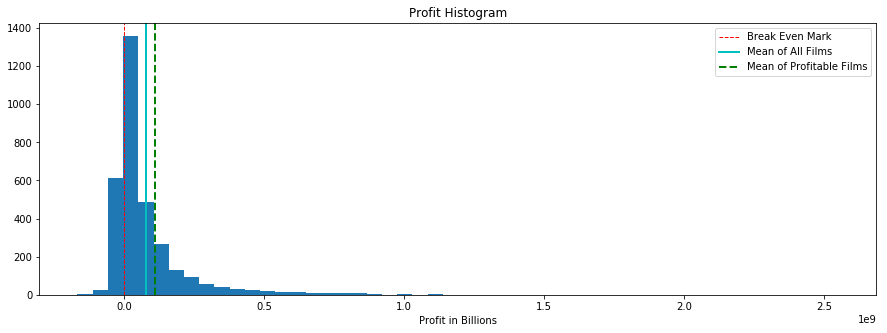

In [60]:
profit = money['profit']
profitable = money.profit[lambda df: money['profit'] > 0]

plt.figure(figsize=(15, 5))
plt.hist(profit, bins=50)
plt.title('Profit Histogram')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label="Break Even Mark")
plt.axvline(profit.mean(), color='c', linestyle='solid', linewidth=2, label="Mean of All Films")
plt.axvline(profitable.mean(), color='green', linestyle='dashed', linewidth=2, label="Mean of Profitable Films")
plt.xlabel('Profit in Billions')
plt.legend(loc='upper right') 

plt.show()

Of the 3229 films with information on budget and revenue, 789 of them lost money and 2 more broke even.  That's nearly a quarter of all films.
Still, most films do a turn a profit, although most turn only a modest profit.  1508 of the profitable films earned less than the mean of all films ($80,588,510), and 930 films profitted above the mean - of those, 10 films earned profit over 1 Billion Dollars.  By removing that highest echelon of profitable films (those in the 1 Billion club), the mean profit drops of $106 million

In [9]:
#create method to extract year from release date
def ExtractYear(val):
    tokens = val.split('-')
    return tokens[0]

#streamline release date data to string
movies['release_date'] = movies['release_date'].astype(str)

#apply year extraction method to release date
movies['release_year'] = movies['release_date'].apply(ExtractYear)

#turn release year data into numbers
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='integer')